In [1]:
%matplotlib inline


# Plotting shots

Start by watching the video below, then learn how to plot shot positions.

..  youtube:: GWsK_KWKCas
   :width: 640
   :height: 349


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Opening the dataset
The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.
Using method *event* and putting the id of the game as a parameter we load the data.
The event data, which we will mostly focus on,
is stored in a dataframe *df*. From this dataframe we take out the names of the two teams.
Then, we filter the dataframe so that only shots are left.



In [7]:
match_id = 69301

In [8]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(match_id = match_id)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [10]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, a425a1dc-0ce2-415e-bf03-55c6b95e794a to 23e173af-2b8f-4507-92d1-b44ce8d477a0
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           19 non-null     int64  
 1   period                          19 non-null     int64  
 2   timestamp                       19 non-null     object 
 3   minute                          19 non-null     int64  
 4   second                          19 non-null     int64  
 5   possession                      19 non-null     int64  
 6   duration                        19 non-null     float64
 7   match_id                        19 non-null     int64  
 8   type_id                         19 non-null     int64  
 9   type_name                       19 non-null     object 
 10  possession_team_id              19 non-null     int64  
 11  possession_team_name            19 

In [9]:
shots

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
a425a1dc-0ce2-415e-bf03-55c6b95e794a,340,1,00:10:24,10,24,18,1.342346,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29463e66-91b9-4d03-aae5-d40a35da078c,531,1,00:15:28,15,28,25,0.472900,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cf531f3a-9c18-49b8-8cfd-7d04806033db,720,1,00:21:08,21,8,35,1.254112,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4bb16d93-d6e4-4717-89b8-950b3dfbfa93,742,1,00:22:46,22,46,37,1.118733,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820f6924-fa10-420d-81f7-f6a66d589edd,956,1,00:30:38,30,38,52,1.359400,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8a45dfd3-2310-48f6-89fe-8c5ae708a94a,1327,1,00:43:53,43,53,75,1.828469,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daabd728-fbb8-4c01-abd1-6989b78bc00f,1485,1,00:48:48,48,48,81,2.337809,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f736b03f-8586-4d14-8541-f291c034ef48,1577,1,00:50:54,50,54,86,0.454200,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4c2ba976-abfe-4968-891f-ff869407a670,1782,2,00:04:49,49,49,100,0.515500,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Making the shot map using iterative solution
First let's draw the pitch using the [MPL Soccer class](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html),

In this example, we set variables for pitch length and width to the Statsbomb coordinate system (they use yards).
You can read more about [different coordinate systems here](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html)

Now, we iterate through all the shots in the match. We take *x* and *y* coordinates, the team name and information
if goal was scored. If It was scored, we plot a solid circle with a name of the player, if not, we plot a
transculent circle (parameter alpha tunes the transcluency).
To have England's shots on one half and Sweden shots on the other half,
we subtract *x* and *y* from the pitch length and height.

Football data tends to be attacking left to right, and we will use this as default in the course.



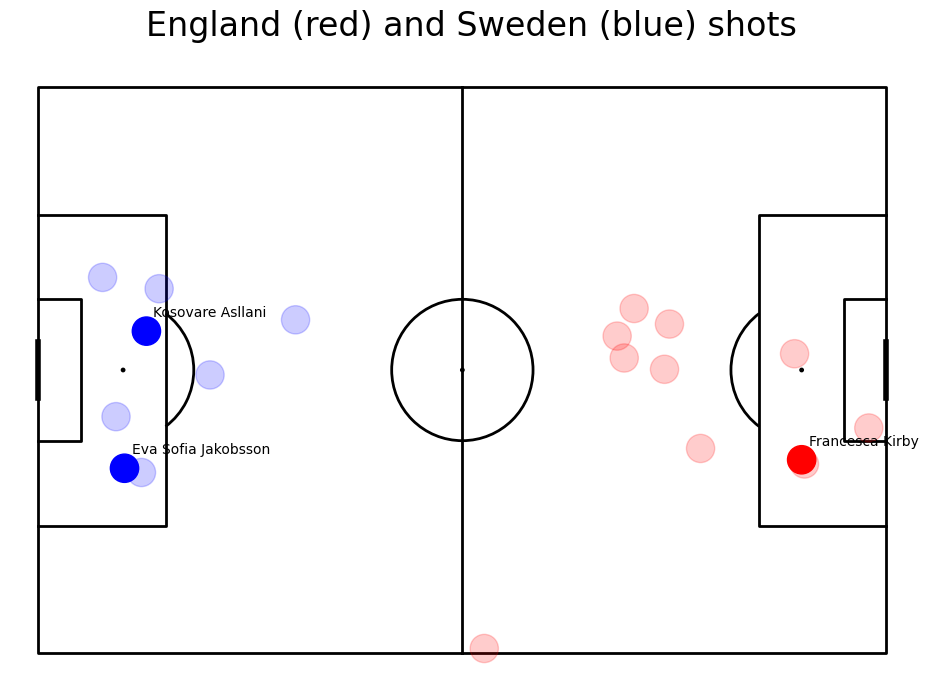

In [11]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information 
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

## Using mplsoccer's Pitch class
This time we make a direct query to return only shots by each team.
We only need the columns with coordinates, outcome (showing if goal was scored),
and player name. If a goal was scored, we use scatter method
to plot a circle and annotate method to mark scorer's name.
If not, we use scatter method to draw a translucent circle. 
Note that, once again, to plot the shots on different halves we needed to reverse the coordinates for Sweden.
Using pitch.scatter we could have plotted all shots using one line. 
However, since name of a player and alpha differs if goal was scored,
it was more convenient to loop through smaller dataset.



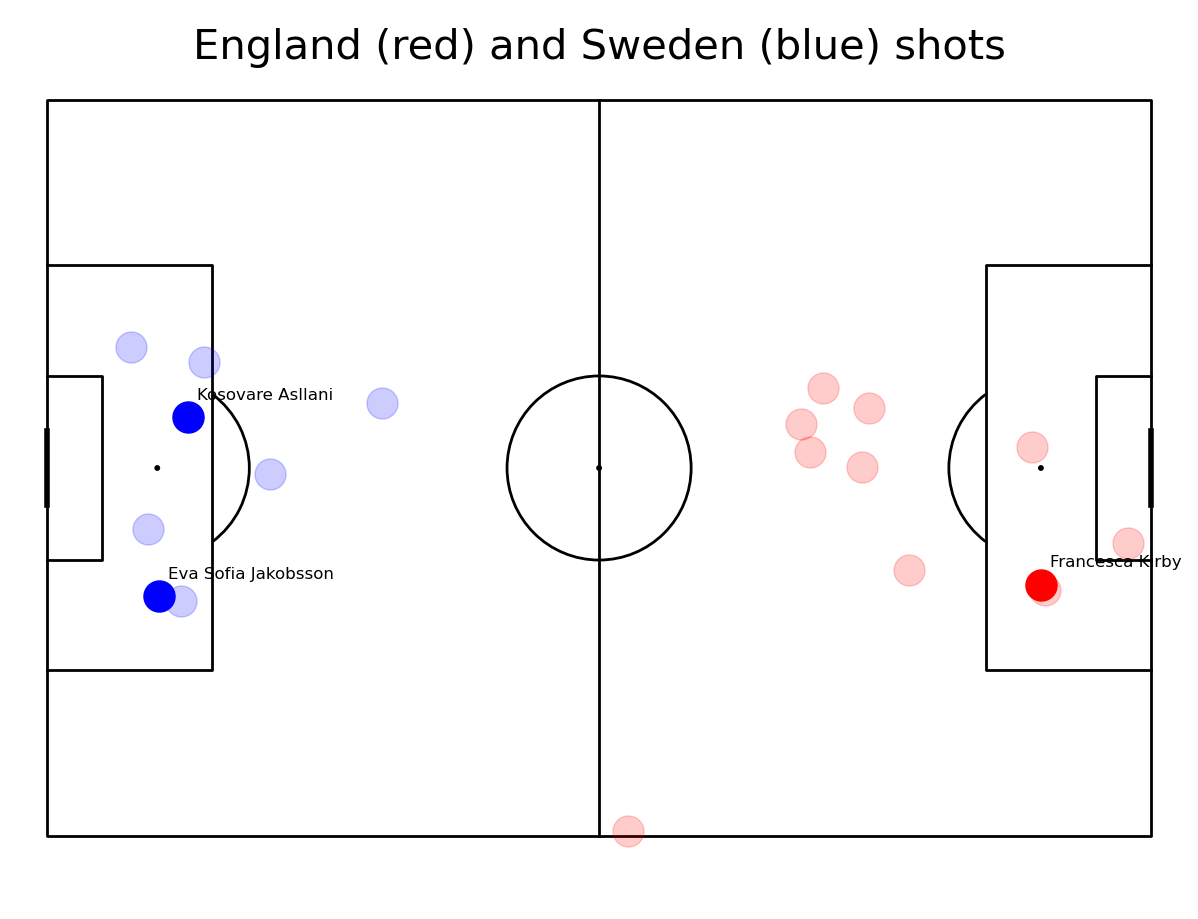

In [13]:
size = 500

#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', 'player_name']]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
        #make circle 
        pitch.scatter(row.x, row.y, alpha = 1, s = size, color = "red", ax=ax['pitch']) 
        pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(row.x, row.y, alpha = 0.2, s = size, color = "red", ax=ax['pitch']) 
       
    
mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', 'player_name']]   

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
        pitch.scatter(pitchLengthX - row.x, pitchWidthY - row.y, alpha = 1, s = size, color = "blue", ax=ax['pitch']) 
        pitch.annotate(row["player_name"], (pitchLengthX - row.x + 1, pitchWidthY - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(pitchLengthX - row.x, pitchWidthY - row.y, alpha = 0.2, s = size, color = "blue", ax=ax['pitch']) 
        
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)           
plt.show()

## Plotting shots on one half
To plot shots of only one team on one half we use VerticalPitch() class
If you set *half* to *True*, you will plot only one half of the pitch.
It is a nice way of plotting shots since they rarely occur on the defensive half.
We plot all the shots at once this time, without looping through the dataframe this time.



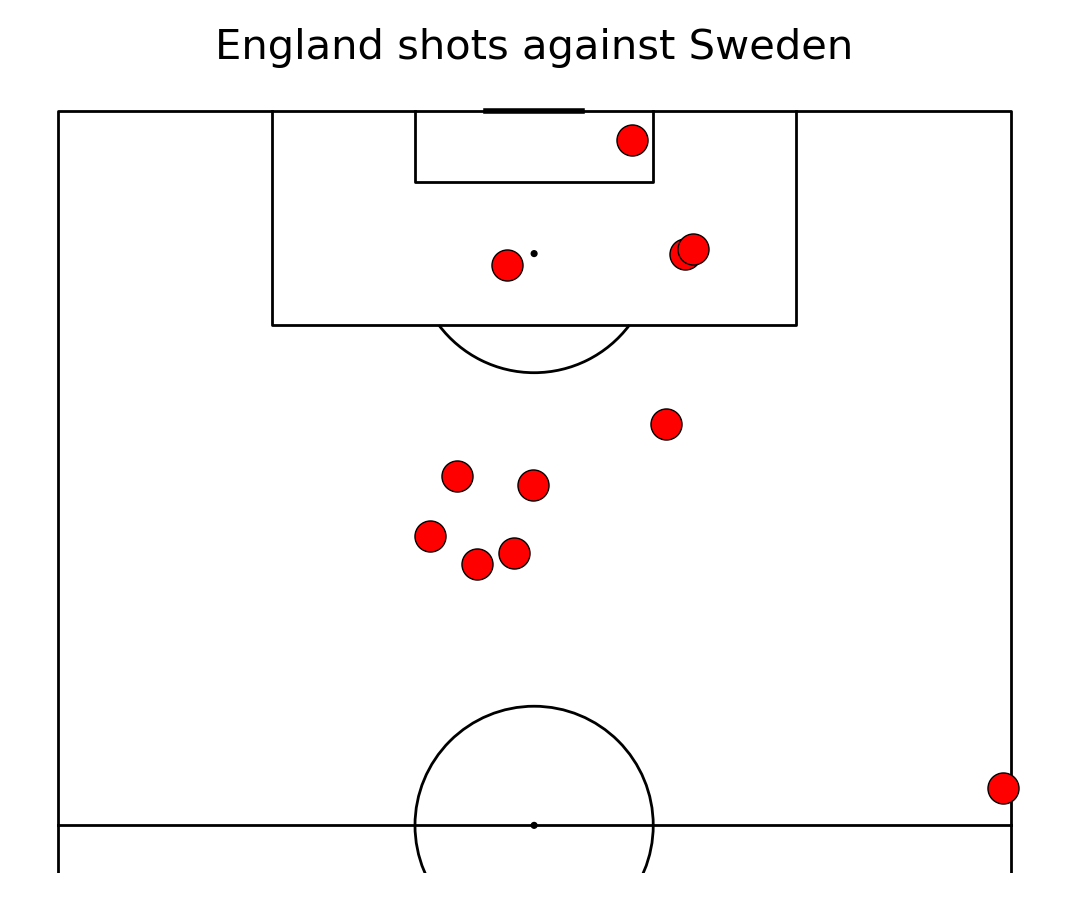

In [14]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black") 
fig.suptitle("England shots against Sweden", fontsize = 30)           
plt.show()

## Challenge - try it before looking at the next page
1) Create a dataframe of passes which contains all the passes in the match
2) Plot the start point of every Sweden pass. Attacking left to right.
3) Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
4) Plot arrows to show where the passes went to.

